# Visualization of GDP Data

## Import packages and define paths

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

pathout = './data/'

if not os.path.exists(pathout):
    os.mkdir(pathout)
    
pathgraphs = './graphs/'
if not os.path.exists(pathgraphs):
    os.mkdir(pathgraphs)

print("Setup completed")

Setup completed


## Download and prepare Maddison Project Data

In [ ]:
try:
    maddison_new = pd.read_stata(pathout + 'Maddison2023.dta')
except:
    maddison_new = pd.read_stata('https://dataverse.nl/api/access/datafile/421303')
    maddison_new.to_stata(pathout + 'Maddison2023.dta', write_index=False, version=117)

Show data types

In [ ]:
print(maddison_new.dtypes)

countrycode     object
country         object
region          object
year             int16
gdppc          float64
pop            float64
dtype: object
region          object
region_name     object
year           float32
cgdppc         float32
rgdpnapc       float32
pop            float64
dtype: object
countrycode     object
country         object
year           float32
gdppc          float32
dtype: object


In [10]:
maddison_new

,countrycode,country,region,year,gdppc,pop
0,AFG,Afghanistan,South and South East Asia,1,NaN,NaN
1,AFG,Afghanistan,South and South East Asia,730,NaN,NaN
2,AFG,Afghanistan,South and South East Asia,1000,NaN,NaN
3,AFG,Afghanistan,South and South East Asia,1090,NaN,NaN
4,AFG,Afghanistan,South and South East Asia,1150,NaN,NaN
...,...,...,...,...,...,...
131139,ZWE,Zimbabwe,Sub Saharan Africa,2018,1900.199191,14096.56
131140,ZWE,Zimbabwe,Sub Saharan Africa,2019,1753.024449,14344.59
131141,ZWE,Zimbabwe,Sub Saharan Africa,2020,1585.972804,14614.82
131142,ZWE,Zimbabwe,Sub Saharan Africa,2021,1687.253154,14900.01


Drop NaN and aggregate by regions

In [17]:
maddison_new = maddison_new.dropna(subset=['gdppc', 'pop'])
maddison_new_regions = maddison_new.groupby(['region', 'year'], as_index=False)[['gdppc', 'pop']].sum()
print(maddison_new_regions)


                 region  year          gdppc        pop
0             East Asia  1000    2234.757000   66500.00
1             East Asia  1500    1207.278000  103000.00
2             East Asia  1600    2278.466000  178500.00
3             East Asia  1700    2615.633000  165000.00
4             East Asia  1820    5865.499940  427757.00
...                 ...   ...            ...        ...
1261  Western Offshoots  2018  186576.990940  393841.23
1262  Western Offshoots  2019  188480.222816  396343.35
1263  Western Offshoots  2020  180995.475199  400373.93
1264  Western Offshoots  2021  190444.692416  401177.34
1265  Western Offshoots  2022  194316.661815  403043.53

[1266 rows x 4 columns]


Split the tables

In [18]:
maddison_new_regions_gdppc = maddison_new_regions[['region', 'year', 'gdppc']]
maddison_new_regions_pop = maddison_new_regions[['region', 'year', 'pop']]
maddison_new_regions_gdppc

,region,year,gdppc
0,East Asia,1000,2234.757000
1,East Asia,1500,1207.278000
2,East Asia,1600,2278.466000
3,East Asia,1700,2615.633000
4,East Asia,1820,5865.499940
...,...,...,...
1261,Western Offshoots,2018,186576.990940
1262,Western Offshoots,2019,188480.222816
1263,Western Offshoots,2020,180995.475199
1264,Western Offshoots,2021,190444.692416


In [19]:
maddison_new_regions_pop

,region,year,pop
0,East Asia,1000,66500.00
1,East Asia,1500,103000.00
2,East Asia,1600,178500.00
3,East Asia,1700,165000.00
4,East Asia,1820,427757.00
...,...,...,...
1261,Western Offshoots,2018,393841.23
1262,Western Offshoots,2019,396343.35
1263,Western Offshoots,2020,400373.93
1264,Western Offshoots,2021,401177.34


Pivot the tables

In [20]:
maddison_new_regions_gdppc_pivot = maddison_new_regions_gdppc.pivot(index='year', columns='region', values='gdppc')
maddison_new_regions_pop_pivot = maddison_new_regions_pop.pivot(index='year', columns='region', values='pop')
maddison_new_regions_gdppc_pivot

region,East Asia,Eastern Europe,Latin America,Middle East and North Africa,South and South East Asia,Sub Saharan Africa,Western Europe,Western Offshoots
year,,,,,,,,
1,NaN,NaN,NaN,5361.000000,NaN,NaN,7392.000000,NaN
1000,2234.757000,NaN,NaN,3031.000000,NaN,NaN,1151.000000,NaN
1500,1207.278000,944.000000,NaN,1852.000000,NaN,NaN,12671.247987,NaN
1600,2278.466000,1038.000000,1720.000000,NaN,1264.000000,NaN,16564.766712,NaN
1700,2615.633000,985.000000,2633.000000,897.000000,1162.000000,2715.000000,17435.199061,NaN
...,...,...,...,...,...,...,...,...
2018,190929.216502,614629.157331,344809.192613,629699.691316,205663.127461,235228.024166,842507.794893,186576.990940
2019,192646.595862,633661.575125,343704.587957,622263.089640,209956.052935,236237.169427,851991.226560,188480.222816
2020,189573.662377,611021.973053,310961.289108,578657.956985,201401.034097,219696.677606,803461.575529,180995.475199


In [21]:
maddison_new_regions_pop_pivot

region,East Asia,Eastern Europe,Latin America,Middle East and North Africa,South and South East Asia,Sub Saharan Africa,Western Europe,Western Offshoots
year,,,,,,,,
1,NaN,NaN,NaN,18300.000000,NaN,NaN,19750.00,NaN
1000,6.650000e+04,NaN,NaN,14000.000000,NaN,NaN,2000.00,NaN
1500,1.030000e+05,4000.000000,NaN,10300.000000,NaN,NaN,40642.00,NaN
1600,1.785000e+05,5000.000000,3800.000000,NaN,1.350000e+05,NaN,54270.00,NaN
1700,1.650000e+05,6000.000000,5800.000000,8400.000000,1.650000e+05,1.000000e+03,61366.00,NaN
...,...,...,...,...,...,...,...,...
2018,1.629583e+06,742411.424236,625013.870000,528316.069768,2.439640e+06,1.059934e+06,423675.74,393841.23
2019,1.634306e+06,743461.894721,631155.848001,537533.756704,2.468025e+06,1.088046e+06,425309.00,396343.35
2020,1.636037e+06,743781.223088,637531.669248,546020.837692,2.496800e+06,1.116789e+06,426314.28,400373.93


Split original Maddison table

In [31]:
maddison_new_gdppc = maddison_new[['country', 'region', 'year', 'gdppc']]
maddison_new_pop = maddison_new[['country', 'region', 'year', 'pop']]

## Visualization

In [15]:
import matplotlib as mpl
import seaborn as sns
# Setup seaborn
sns.set()

Pick some colors and create a color map

In [23]:
my_colors = ["#1abc9c", "#e67e22", "#f1c40f", "#8e44ad", 
            "#2c3e50", "#d35400", "#27ae60", "#2980b9"]
my_cmap = mpl.colors.ListedColormap(sns.color_palette(my_colors).as_hex())

### GPD per capita per year by region since 1800

Text(0, 0.5, 'GDP per capita')

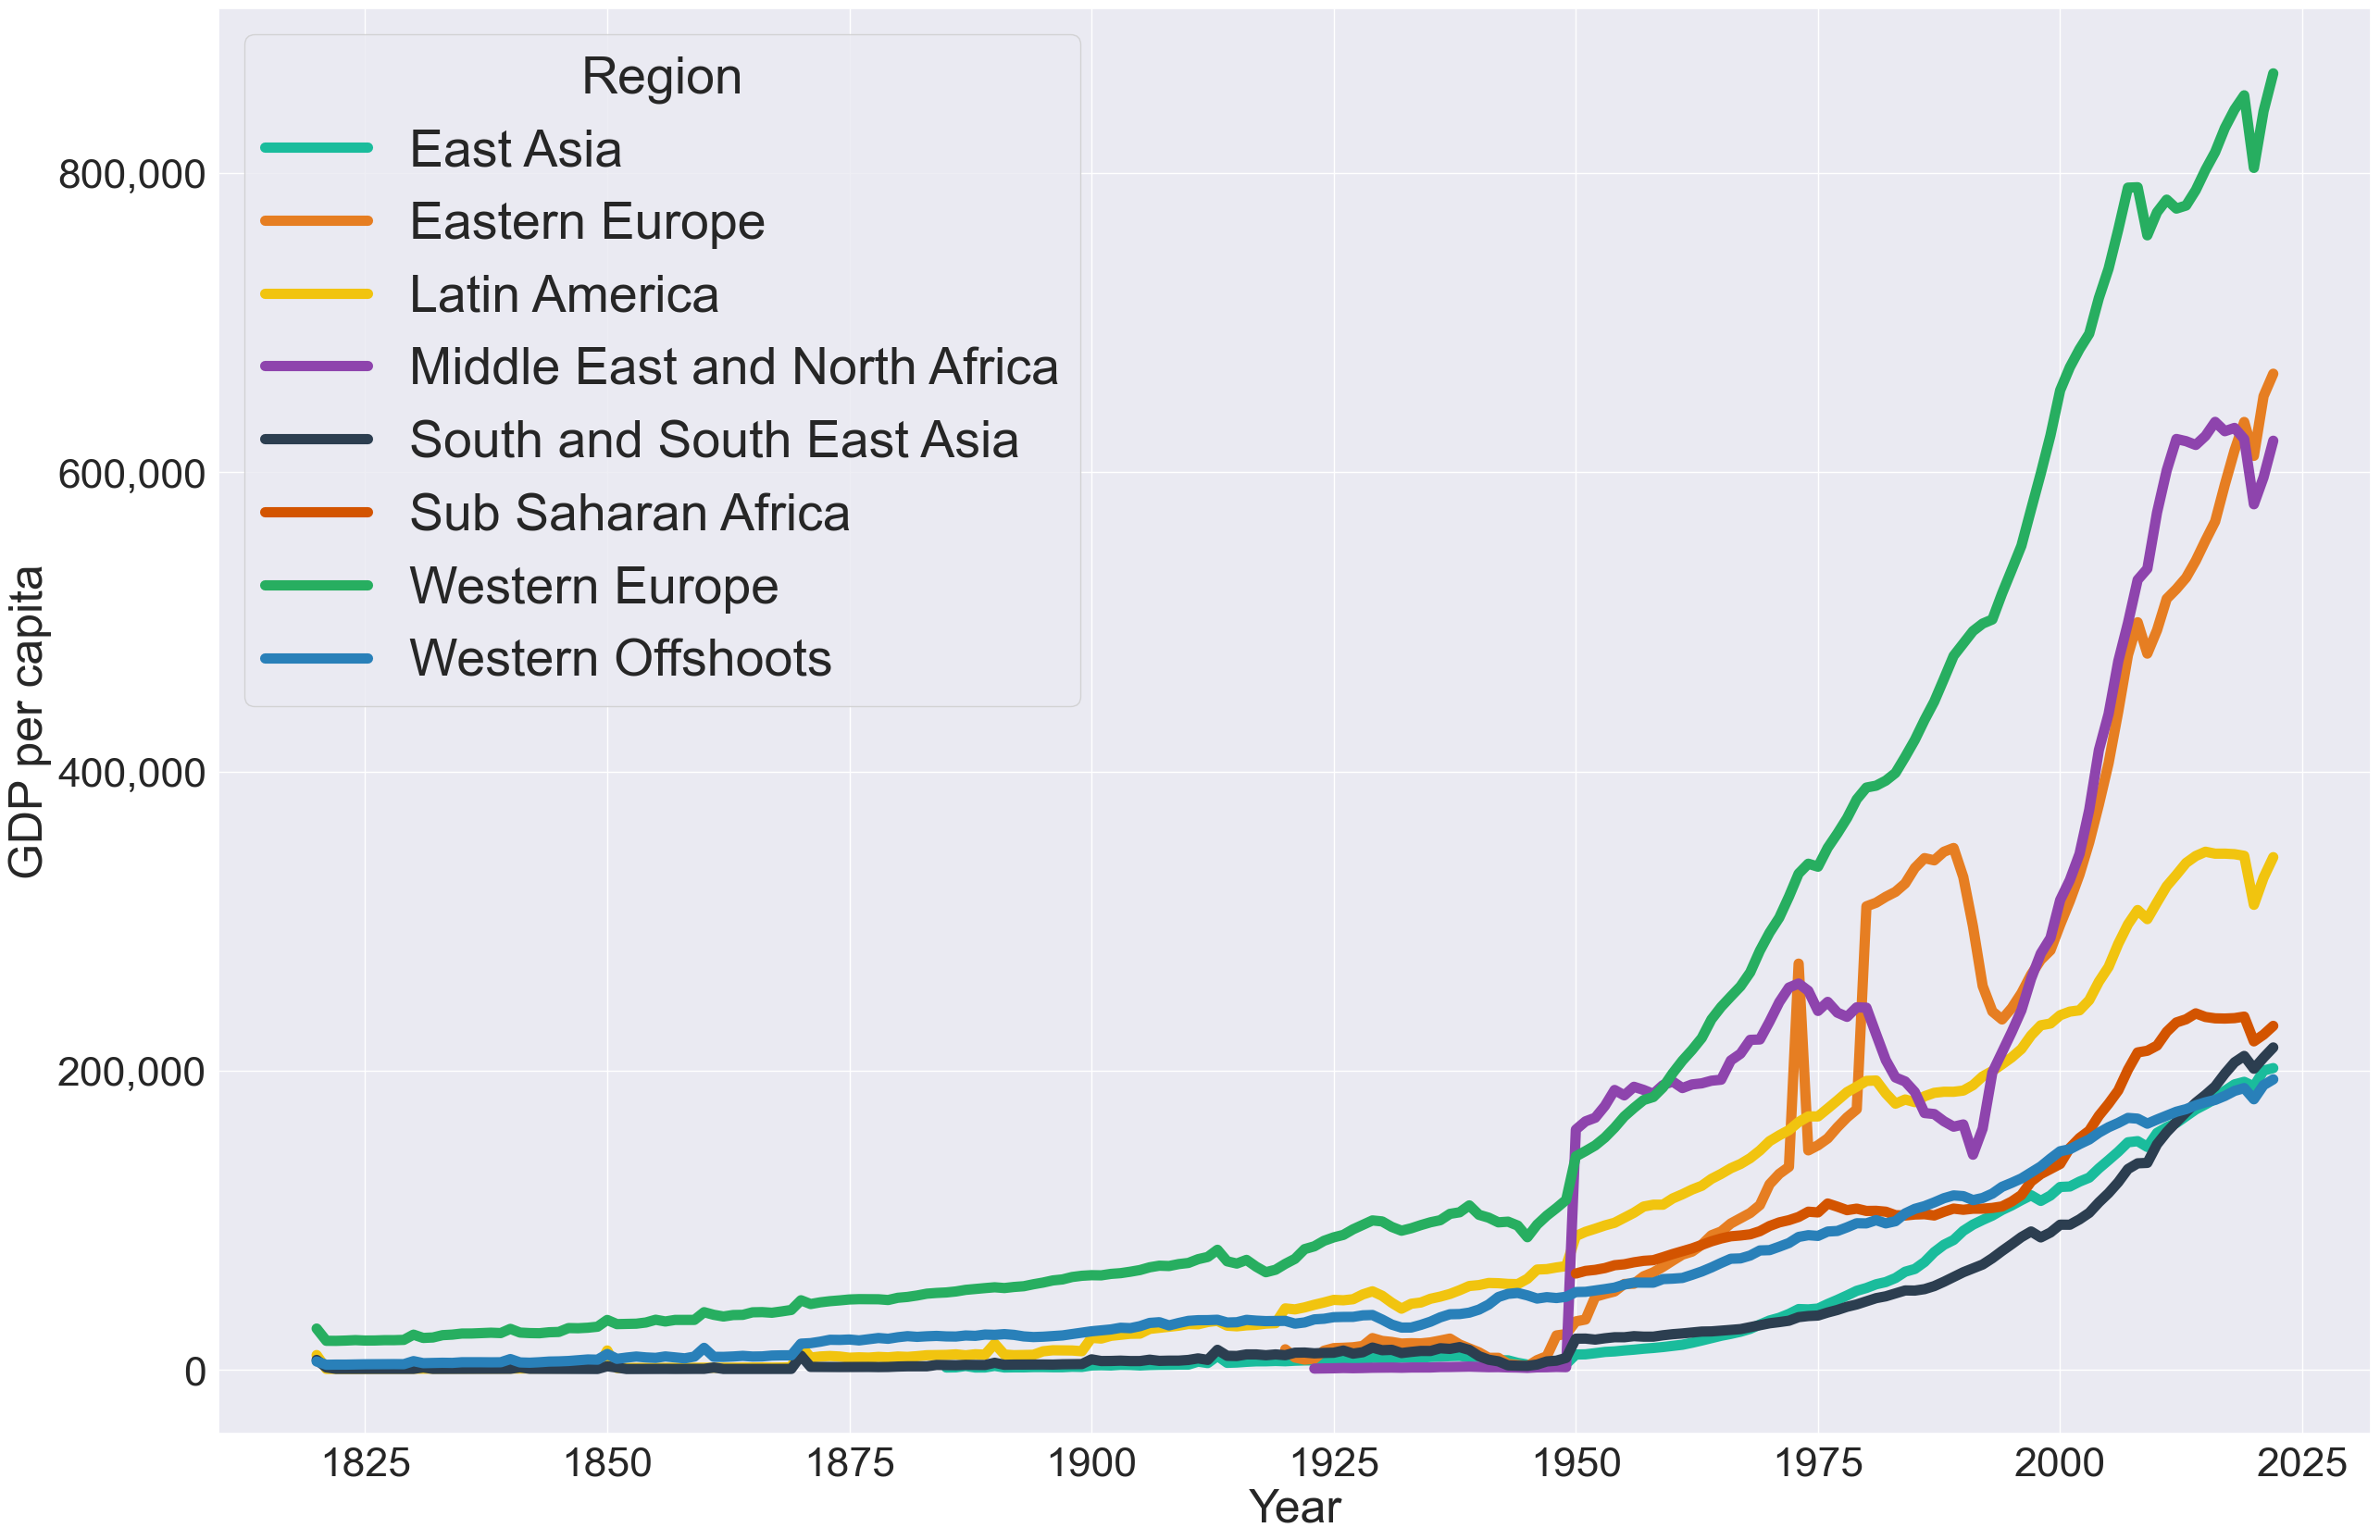

In [24]:
# Set the size of the figure and get a figure and axis object
fig, ax = plt.subplots(figsize=(30,20))
# Plot using the axis ax and colormap my_cmap
maddison_new_regions_gdppc_pivot.loc[1800:].plot(ax=ax, linewidth=8, cmap=my_cmap)
# Change options of axes, legend
ax.tick_params(axis = 'both', which = 'major', labelsize=32)
ax.tick_params(axis = 'both', which = 'minor', labelsize=16)
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
ax.legend(prop={'size': 40}).set_title("Region", prop = {'size':40})
# Label axes
ax.set_xlabel('Year', fontsize=36)
ax.set_ylabel('GDP per capita', fontsize=36)

### Log(GPD per capita) per year by region since 1950

Text(0, 0.5, 'GDP per capita')

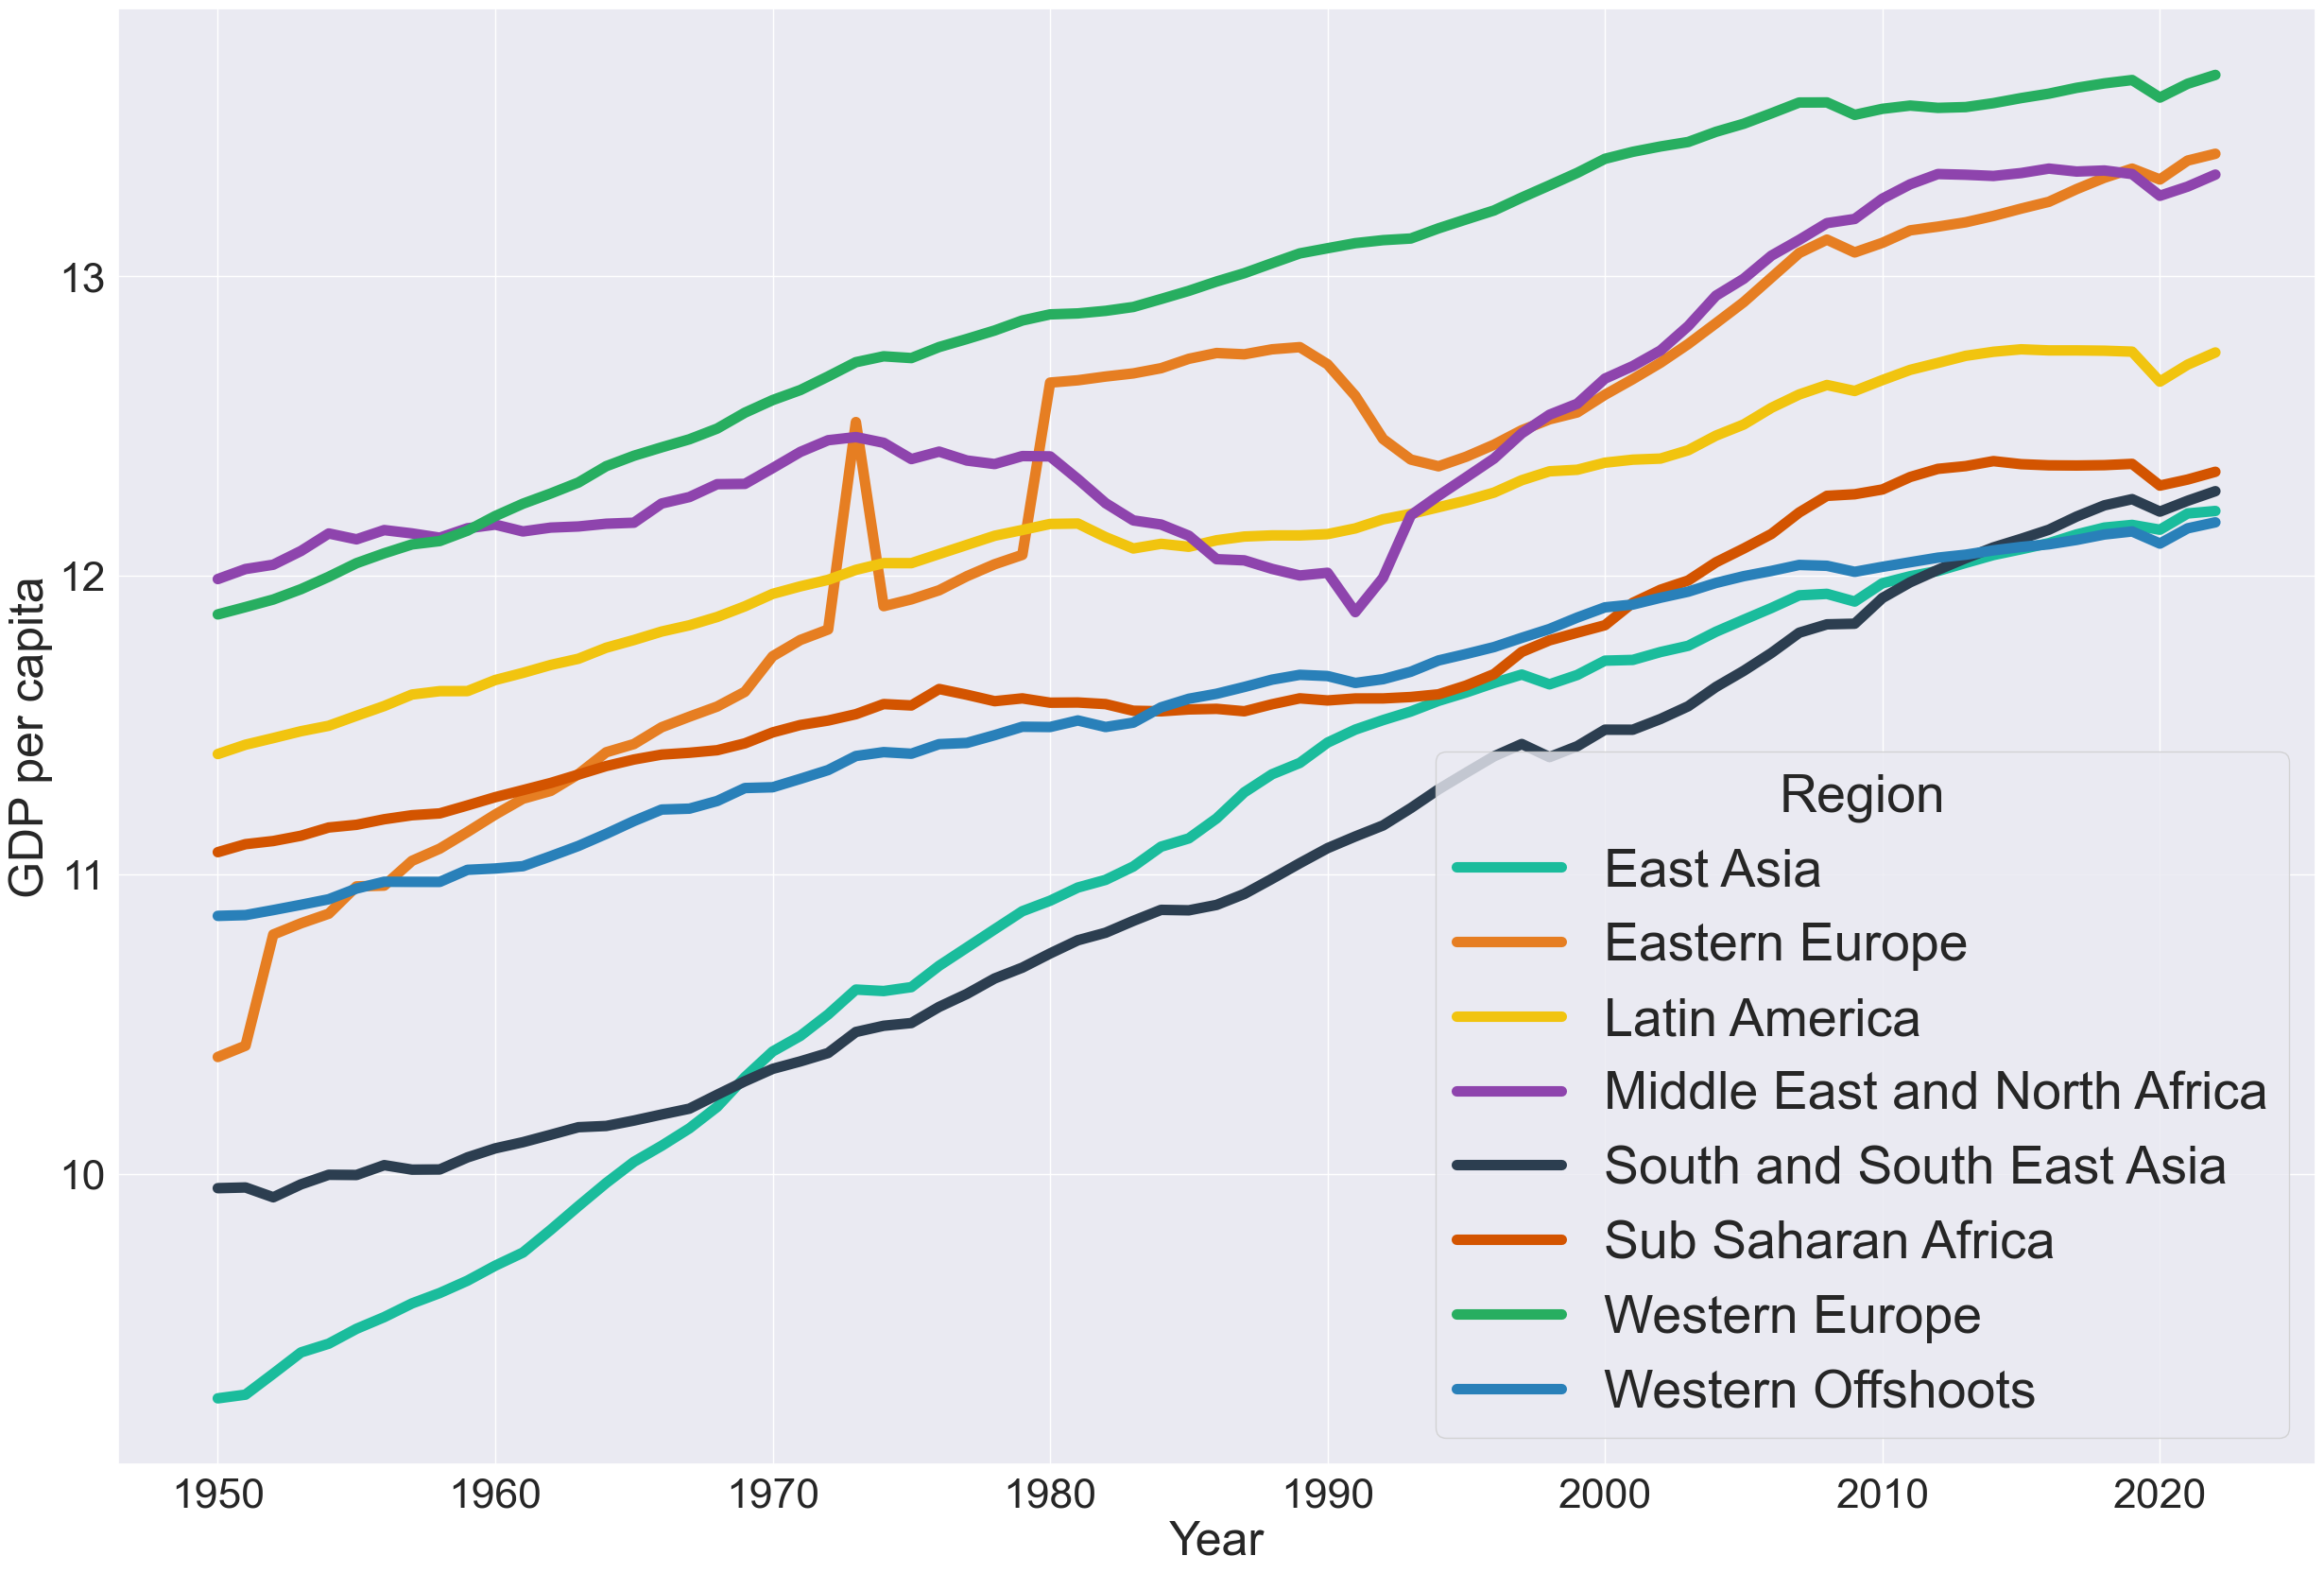

In [29]:
# Set the size of the figure and get a figure and axis object
fig, ax = plt.subplots(figsize=(30,20))
# Plot using the axis ax and colormap my_cmap
maddison_new_regions_gdppc_pivot.loc[1950:].apply(np.log).plot(ax=ax, linewidth=8, cmap=my_cmap)
# Change options of axes, legend
ax.tick_params(axis = 'both', which = 'major', labelsize=32)
ax.tick_params(axis = 'both', which = 'minor', labelsize=16)
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
ax.legend(prop={'size': 40}).set_title("Region", prop = {'size':40})
# Label axes
ax.set_xlabel('Year', fontsize=36)
ax.set_ylabel('GDP per capita', fontsize=36)

### GDP per capita per year by country in Western European countries since 1950

In [ ]:
# Create subset and pivot
maddison_new_gdppc_west = maddison_new_gdppc[maddison_new_gdppc['region'].isin(['Western Europe'])]
maddison_new_gdppc_west_pivot = maddison_new_gdppc_west.pivot(index='year', columns='country', values='gdppc')
maddison_new_gdppc_west_pivot

Text(0, 0.5, 'GDP per capita')

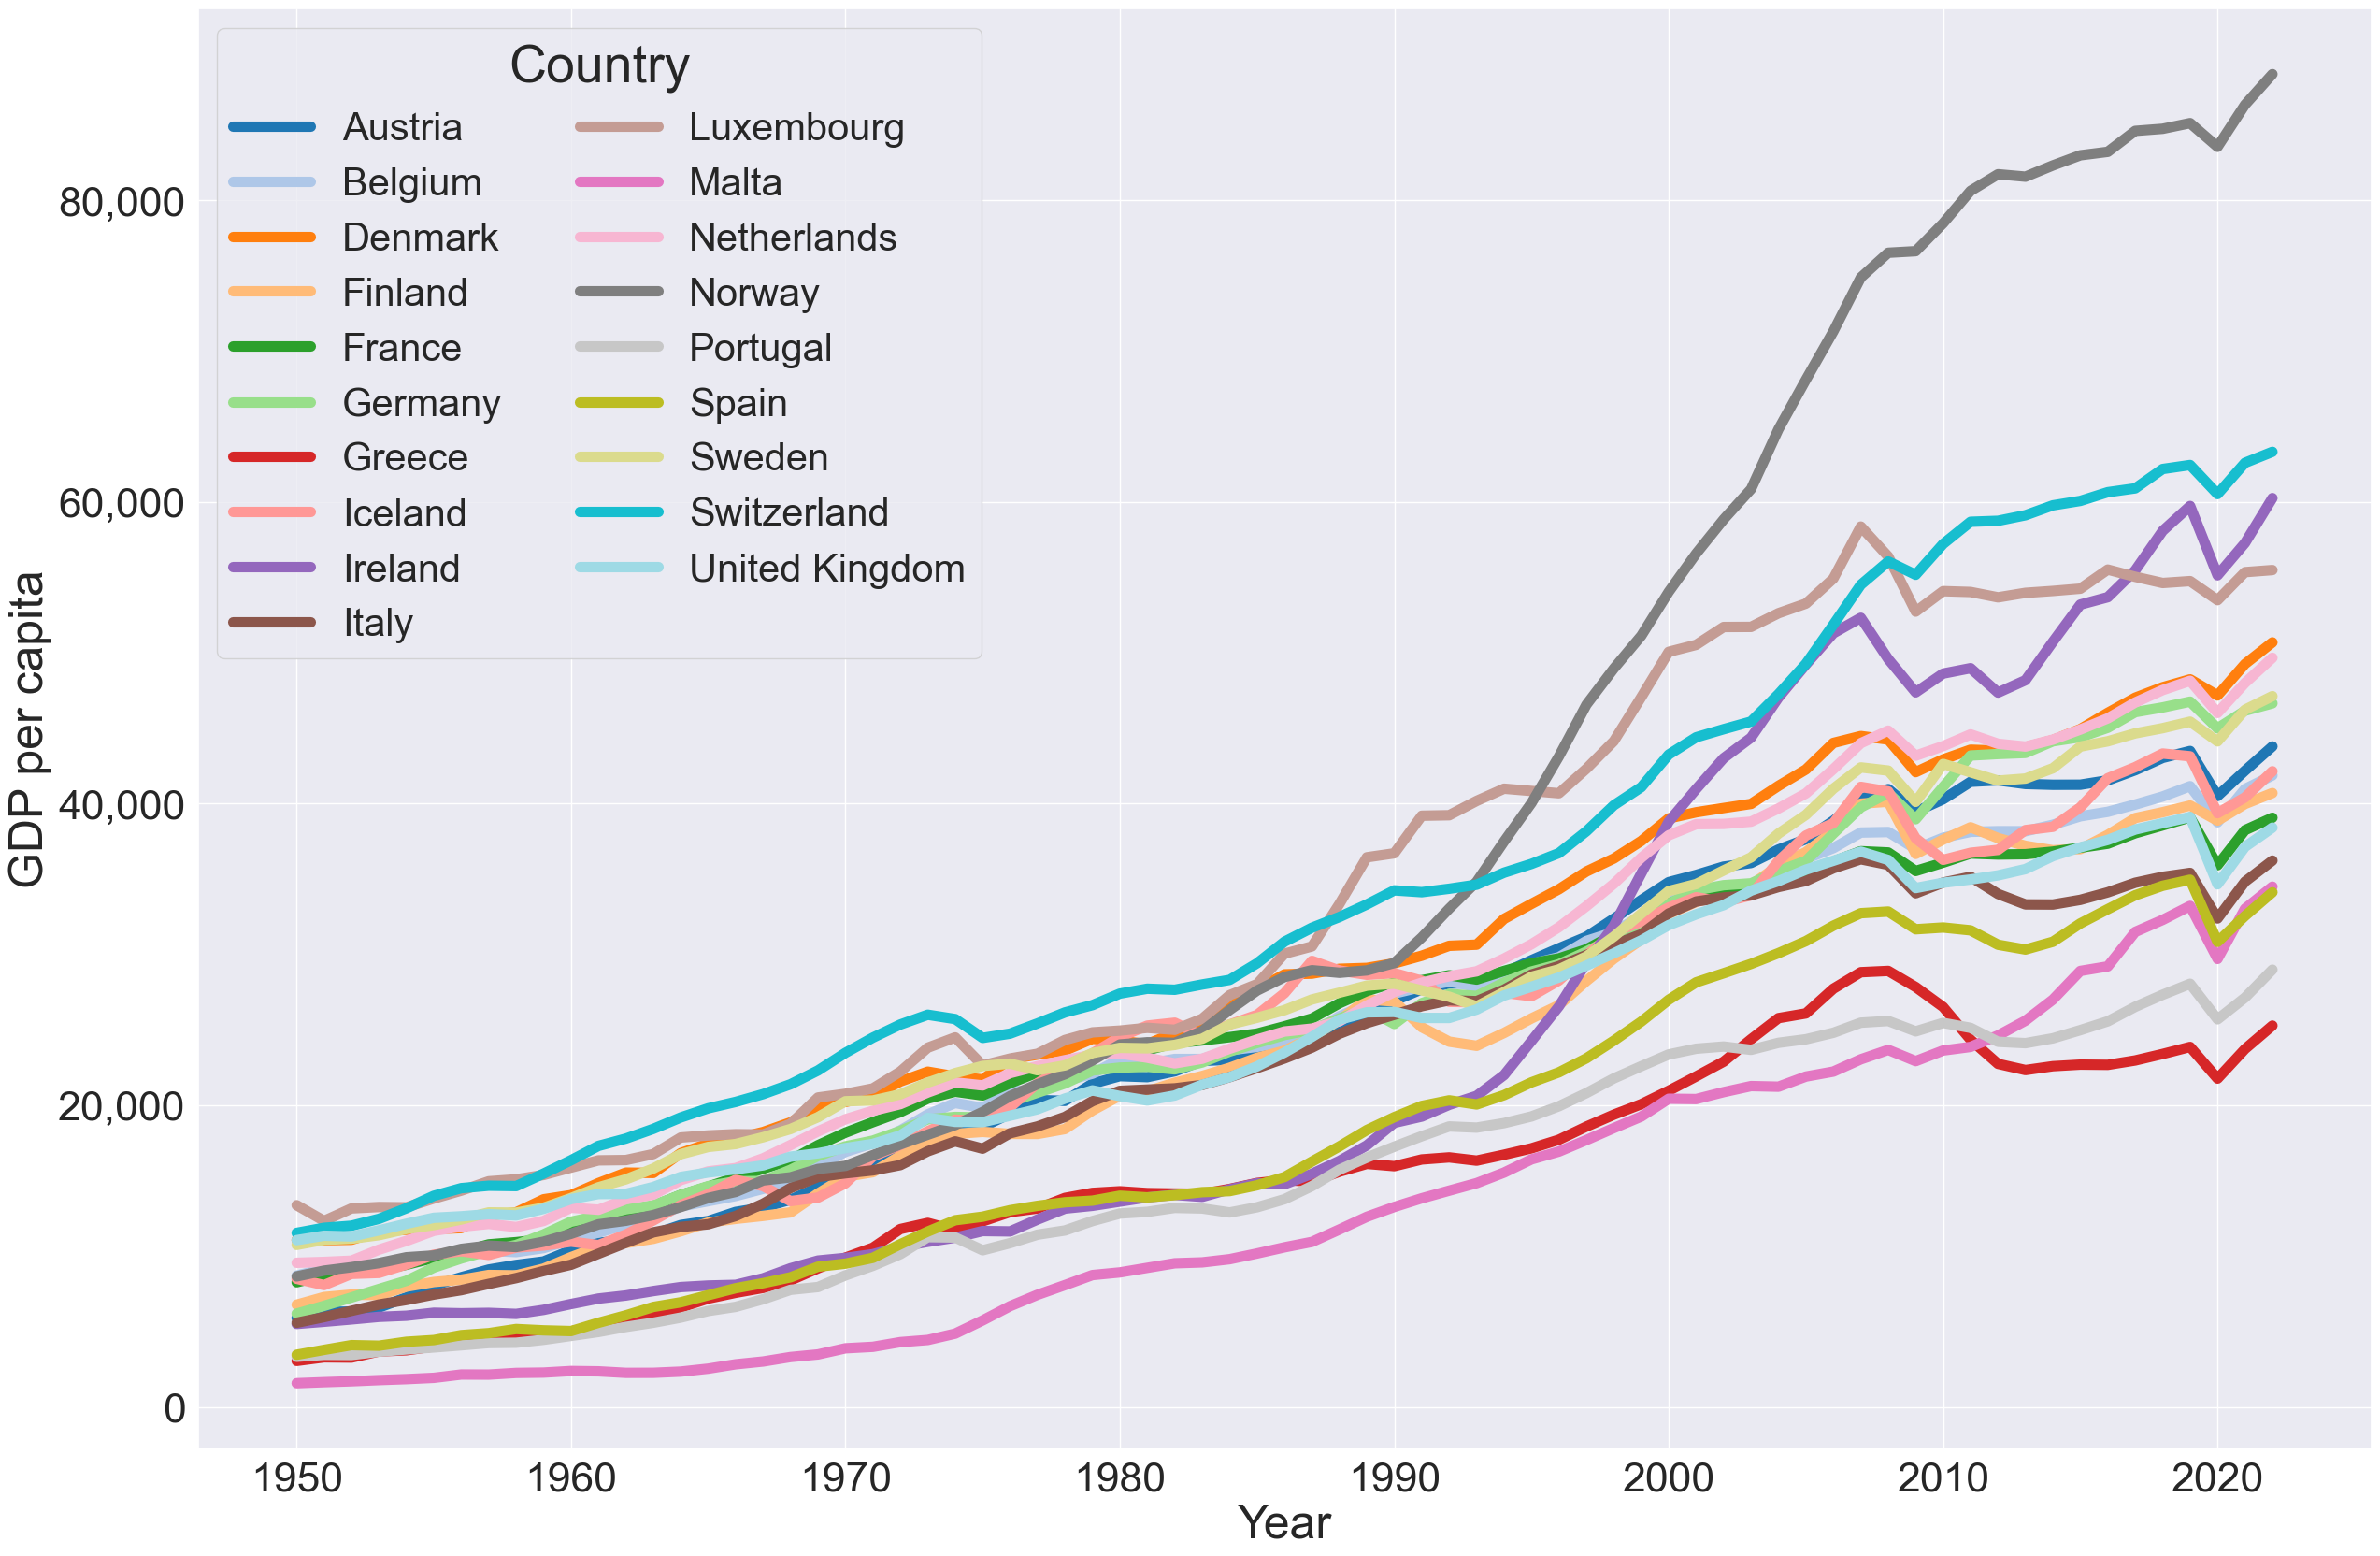

In [43]:
# Create new color map
my_cmap_west = plt.get_cmap('tab20', len(maddison_new_gdppc_west_pivot.index))

# Set the size of the figure and get a figure and axis object
fig, ax = plt.subplots(figsize=(30,20))
# Plot using the axis ax and colormap my_cmap
maddison_new_gdppc_west_pivot.loc[1950:].plot(ax=ax, linewidth=8, cmap=my_cmap_west)
# Change options of axes, legend
ax.tick_params(axis = 'both', which = 'major', labelsize=32)
ax.tick_params(axis = 'both', which = 'minor', labelsize=16)
ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))
ax.legend(prop={'size': 30}, loc = 'upper left', ncol = 2).set_title("Country", prop = {'size':40})
# Label axes
ax.set_xlabel('Year', fontsize=36)
ax.set_ylabel('GDP per capita', fontsize=36)

### GDP per capita and population growth rates in Western countries since 1950

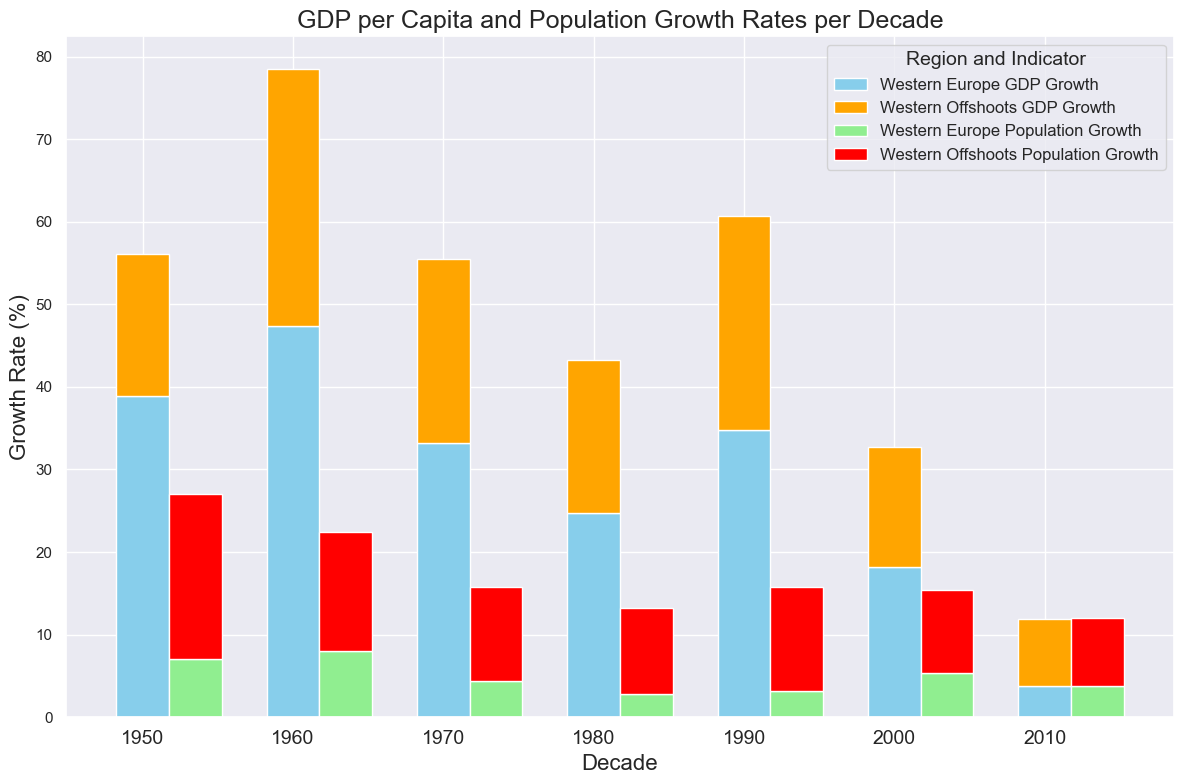

In [47]:
# Filter the data for these two regions from the GDP per capita and population data
gdppc_data = maddison_new_regions_gdppc_pivot[["Western Europe", "Western Offshoots"]]
pop_data = maddison_new_regions_pop_pivot[["Western Europe", "Western Offshoots"]]

# Calculate the growth rates per decade
def calculate_growth_rate(data):
    growth_rates = {}
    for region in ["Western Europe", "Western Offshoots"]:
        region_data = data[region]
        growth_rate = []
        for year in range(1950, region_data.index[-1], 10):  # Iterate in steps of 10 years
            start_value = region_data.loc[year]
            end_value = region_data.loc[year + 10] if (year + 10) in region_data.index else None
            if start_value is not None and end_value is not None:
                rate = ((end_value - start_value) / start_value) * 100
                growth_rate.append(rate)
        growth_rates[region] = growth_rate
    return growth_rates

# Get growth rates for GDP per capita and population
gdppc_growth = calculate_growth_rate(gdppc_data)
pop_growth = calculate_growth_rate(pop_data)

# Convert growth rates to DataFrame for plotting
gdppc_growth_df = pd.DataFrame(gdppc_growth, index=range(1950, 2020, 10))
pop_growth_df = pd.DataFrame(pop_growth, index=range(1950, 2020, 10))

# Create the bar chart
fig, ax = plt.subplots(figsize=(12, 8))

# Define the positions for the bars (adjusted for width and spacing)
x = np.arange(len(gdppc_growth_df))  # x-axis positions
width = 0.35  # Bar width

# Plot GDP per capita growth rates
ax.bar(x, gdppc_growth_df["Western Europe"], width, label="Western Europe GDP Growth", color='skyblue')
ax.bar(x, gdppc_growth_df["Western Offshoots"], width, bottom=gdppc_growth_df["Western Europe"], label="Western Offshoots GDP Growth", color='orange')

# Plot Population growth rates
ax.bar(x + width, pop_growth_df["Western Europe"], width, label="Western Europe Population Growth", color='lightgreen')
ax.bar(x + width, pop_growth_df["Western Offshoots"], width, bottom=pop_growth_df["Western Europe"], label="Western Offshoots Population Growth", color='red')

# Labeling and formatting
ax.set_xlabel('Decade', fontsize=16)
ax.set_ylabel('Growth Rate (%)', fontsize=16)
ax.set_title('GDP per Capita and Population Growth Rates per Decade', fontsize=18)
ax.set_xticks(x)
ax.set_xticklabels(gdppc_growth_df.index, fontsize=14)
ax.legend(title="Region and Indicator", fontsize=12, title_fontsize=14)

# Show the plot
plt.tight_layout()
plt.show()

### GDP per capita and population growth rates in Germany since 1950

In [52]:
# Create subset and pivot for population data
maddison_new_pop_west = maddison_new_pop[maddison_new_pop['region'].isin(['Western Europe'])]
maddison_new_pop_west_pivot = maddison_new_pop_west.pivot(index='year', columns='country', values='pop')
maddison_new_pop_west_pivot

country,Austria,Belgium,Denmark,Finland,France,Germany,Greece,Iceland,Ireland,Italy,Luxembourg,Malta,Netherlands,Norway,Portugal,Spain,Sweden,Switzerland,United Kingdom
year,,,,,,,,,,,,,,,,,,,
1,NaN,300.00,NaN,NaN,5000.00,NaN,2000.00,NaN,NaN,8000.00,NaN,NaN,NaN,NaN,400.00,3750.00,NaN,300.00,NaN
1000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2000.00
1500,NaN,1400.00,NaN,NaN,15000.00,12000.00,NaN,NaN,NaN,NaN,NaN,NaN,950.00,NaN,NaN,6800.00,550.00,NaN,3942.00
1600,NaN,1600.00,NaN,400.00,18500.00,16000.00,NaN,NaN,NaN,NaN,NaN,NaN,1500.00,NaN,1100.00,8240.00,760.00,NaN,6170.00
1700,NaN,2000.00,NaN,400.00,21471.00,15000.00,NaN,NaN,NaN,NaN,NaN,NaN,1900.00,NaN,2000.00,8770.00,1260.00,NaN,8565.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018,8889.62,11428.50,5795.08,5516.23,67347.11,82923.13,10589.99,352.6,4863.70,59902.20,610.49,484.93,17237.95,5313.26,10209.42,46738.99,10175.33,8564.88,66732.33
2019,8929.79,11490.51,5818.08,5521.63,67659.64,83110.16,10578.82,360.5,4930.26,59754.04,623.22,504.43,17350.99,5349.27,10211.90,47115.62,10279.01,8626.19,67094.94
2020,8969.23,11545.52,5831.08,5530.73,67901.27,83178.18,10556.14,366.4,4983.46,59463.72,632.84,515.56,17448.02,5380.28,10222.62,47366.01,10353.56,8689.45,67380.21


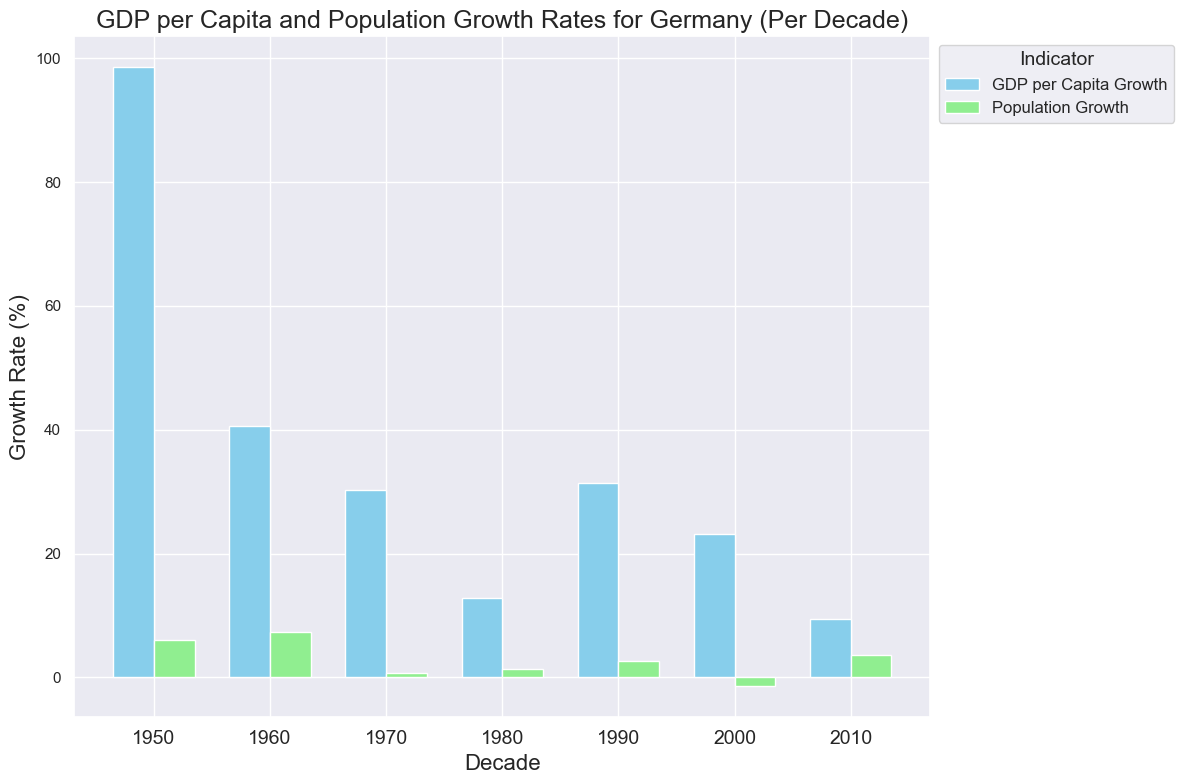

In [58]:
# Filter the data for these two regions from the GDP per capita and population data
gdppc_data_de = maddison_new_gdppc_west_pivot["Germany"]
pop_data_de = maddison_new_pop_west_pivot["Germany"]

# Calculate the growth rates per decade for a specific country
def calculate_growth_rate_for_country(data):
    growth_rates = []
    for year in range(1950, data.index[-1], 10):  # Iterate in steps of 10 years
        start_value = data.loc[year]
        end_value = data.loc[year + 10] if (year + 10) in data.index else None
        if start_value is not None and end_value is not None:
            growth_rate = (end_value - start_value) / start_value * 100  # Growth rate in percentage
            growth_rates.append(growth_rate)
    return growth_rates

# Get growth rates for GDP per capita and population
gdppc_growth_de = calculate_growth_rate_for_country(gdppc_data_de)
pop_growth_de = calculate_growth_rate_for_country(pop_data_de)

# Convert the growth rates to DataFrame for easier plotting
gdppc_growth_de_df = pd.DataFrame({'GDP per Capita Growth (%)': gdppc_growth_de}, index=range(1950, 2020, 10))
pop_growth_de_df = pd.DataFrame({'Population Growth (%)': pop_growth_de}, index=range(1950, 2020, 10))

# Plot the bar chart for Germany
fig, ax = plt.subplots(figsize=(12, 8))

# Define the positions for the bars (adjusted for width and spacing)
x = np.arange(len(gdppc_growth_de_df))  # x-axis positions
width = 0.35  # Bar width

# Plot the GDP per capita growth rates for Germany
ax.bar(x - width / 2, gdppc_growth_de_df["GDP per Capita Growth (%)"], width, label="GDP per Capita Growth", color='skyblue')

# Plot the Population growth rates for Germany
ax.bar(x + width / 2, pop_growth_de_df["Population Growth (%)"], width, label="Population Growth", color='lightgreen')

# Labeling and formatting
ax.set_xlabel('Decade', fontsize=16)
ax.set_ylabel('Growth Rate (%)', fontsize=16)
ax.set_title('GDP per Capita and Population Growth Rates for Germany (Per Decade)', fontsize=18)
ax.set_xticks(x)  # Position the x-ticks in the middle of the grouped bars
ax.set_xticklabels(gdppc_growth_de_df.index, fontsize=14)

# Adjust legend
ax.legend(title="Indicator", fontsize=12, title_fontsize=14, loc='upper left', bbox_to_anchor=(1, 1))

# Show the plot
plt.tight_layout()
plt.show()